In [24]:
import random
import math
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import urllib.request as url
import numpy as np
import scanpy as sc
import pandas as pd
import tarfile
import csv
from numba import njit, jit
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin


class Kmeans(BaseEstimator, ClusterMixin, TransformerMixin):               # Input: processed dataset, Output: clustered data (kmeans, minibatch, kmeans++)
    def __init__(self, inits=10, k=8, maxit=300):
        
        self.labels_ = None
        self.cluster_centers_ = None
        self._inits = inits
        self._k = k
        self._maxit = maxit
       # dot = np.random.choice(range(len(self._data)), self._k, replace=False)
        #self._clusters = self._data[dot]
   

    def fit(self,data):
        self._data = data
        best_clust = float('inf')
        
        for i in (range(self._inits)):
            dot = np.random.choice(range(len(self._data)), self._k, replace=False)
            self.cluster_centers_ = self._data[dot]
            for i in range(self._maxit):
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis = 0)
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    self.cluster_centers_[i] = self._data[position].mean(axis = 0)
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
                
        return self
   
    
    def predict(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
        self.labels_ = np.argmin(eucl, axis = 0)
        return self.labels_ #returns the cluster with minimum distance
    
    def transform(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2)
        return eucl.T
        
    '''
        #@jit(nopython=True)
    def fit(self):
        for i in range(k): # range of clusters
            position = np.where(self._dist == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
            self._clusters[i] = self._data[position].mean(axis = 0)
                #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
            return self._clusters # return new clusters  
    def kmeans(self, inits=None, k=None, maxit=None):   # the original
        if inits is None:
            inits = self._inits
        if k is None:
            k = self._k
        if maxit is None:
            maxit = self._maxit
    
        clusters = create_clusters(self._data, k)
        for i in range(maxit):
            dist = distances(clusters,self._data)
            clusters = fit(self._data,dist,k)
        
        self._clusters = clusters
        self._dist = dist
        '''

In [25]:
import random
import math
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs

df_rand = pd.DataFrame(np.random.randint(0,100,size=(2, 100)), index =("PC1","PC2"))
X, y_true = make_blobs(n_samples=600, centers=8,
                       cluster_std=0.60, random_state=0)
def plot(data, dist, clusters,k):
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        plt.plot(graph[0], graph[1], "o")
        plt.plot(center[0],center[1], "kx")
    plt.show

In [28]:
test = Kmeans()
test.fit(X)

/anaconda3/envs/igem/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Kmeans(inits=None, k=None, maxit=None)

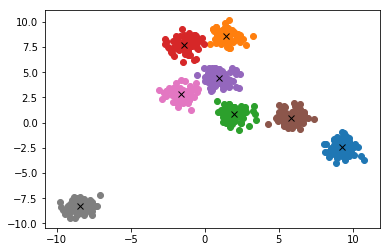

In [29]:
plot(X,test.labels_,test.cluster_centers_,8)

In [30]:
test.cluster_centers_

array([[ 9.24845791, -2.39615122],
       [ 1.45084308,  8.59867783],
       [ 1.98361742,  0.85657898],
       [-1.39894034,  7.75367979],
       [ 0.93775178,  4.41581079],
       [ 5.80672004,  0.49923519],
       [-1.5859099 ,  2.82252793],
       [-8.4225089 , -8.29757349]])

In [ ]:
import WWDK_Package